In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Устанавливаем глобальный seed для всех случайностей
np.random.seed(42)

# Введение в генеративное моделирование

### Структура работы генеративной модели
___Генеративная модель___ оценивает __p(x)__ — вероятность получения наблюдения x.

![title](images/generationpipe.png)

### Прогресс в генерации лиц

![title](images/progress2.png)

В нижнем ряду показаны примеры генерации лиц из работы:

Karras, T., Laine, S., & Aila, T. (2019). A style-based generator architecture for generative adversarial networks. In Proceedings of the IEEE/CVF conference on computer vision and pattern recognition (pp. 4401-4410).
* proceedings работы ([ссылка](https://ieeexplore.ieee.org/document/8953766/authors#authors))
* онлайн сервис, с большим количеством примеров ([ссылка](https://generated.photos/faces))

### Примеры генерации по текстовому описанию

Нарисуй картину с абстрактными фрактальными конструкциями, похожими на структура мозга расползающимися среди галактик.
![title](images/brain_universe.png)

Замени фрактальные структуры мозга на интегральные схемы. Как будто среди вселенной распространяется ИИ.
![title](images/chip_universe.png)

Cгенерируй реалистичную фотографию мужчины средних лет одетого в костюм штурмовика без шлема с эмблемой кока-колы на нагруднике.
![title](images/star_wars_man.png)

## Основы генеративного моделирования

Набор точек __X__ сгенерирован правилом _Pdata_.

Возьмите на себя роль генеративной модели). Выберете точку _(x1, x2)_ чтобы она принадлежала распределению _Pdata_.



![title](images/pdata.png)

* Точка А нарушает правило 1 базовых принципов генеративного моделирования — ясно видно, что она не принадлежит распределению pdata, поскольку находится посреди моря.

* Точка B настолько близко расположена от точки из исходного набора данных, что мы не впечатлены способностью модели создать такую точку. Если все образцы, сгенерированные моделью, будут расположены так же близко к точкам из исходного набора, то это можно считать нарушением правила 2 базовых принципов генеративного моделирования.

* Точку C можно рассматривать как успех, потому что она вполне могла быть получена из распределения pdata и существенно отличается от всех точек в исходном наборе.

![title](images/gtdata.png)

# Генеративная модель

На примере с картой мира мы побывали в роли генеративной модели.

Еще раз рассмотрим как работает генеративная модель.

![image](images/source_of_data.png)

У нас есть некоторый источник порождающий данные $X^{data}$.

$Х^{data}$ - это случайная величина.
Случайная, т.е. есть Неопределенность. Мы не знаем какое значение будет получено следующим.

Для нас Источник данных это "черная коробочка" или "таинственный сундук".

Как он устроен внутри неизвестно.

Неизвестно статистическое распределение $P_{data}$ (или вероятностная модель) согласно которой генерируются эти данные $X^{data}$.

В целом распределения $P_{data}$ у Источника может и не быть, но в задаче генеративного моделирования мы полагаем, что оно есть.

Мы наблюдали за Источником, и собрали некоторую выборку $X^{data}$ из экспериментальных данных $X^{data}=\left\lbrace X_1^{data}, X_2^{data},X_3^{data}, ...,\right\rbrace$ , размером $n$.

Пока мы рассматриваем одномерную случайную величину $X^{data}$  , она является действительным числом.
Отобразим все значения выборки $Х^{data}$ на Оси $Х$.

![image](images/generative_model.png)

**Генеративная модель:**
* принимает в себя экспериментальную выборку значений $Х^{data}$
* моделирует статистическое распределение наших данных на основе значений $Х^{data}$

Она "подбирает" статистическое распределение $P_{model}(Х)$, которое по ее мнению лучшим образом описывает процесс генерации данных.
Имея распределение $P_{model}(Х)$, мы можем генерировать новые образцы данных $X^{model}$, но уже из этого распределения.

Мы хотим, чтобы:
* Сгенерированные ей образы $X^{model}$ были похожими на образцы $X^{data}$.

Чем больше $P_{model}(Х)$ походит на $P_{data}(X)$, тем больше образцы $X^{model}$ будут походить на образцы $X^{data}$.

* Модель генерировала новые образцы, отличающиеся от тех, что были в обучающей выборке $X$.

А не просто запомнила, нашу выборку и отдавала значения из нее.

# Дискретная случайная величина

И так сейчас мы отправимся в `Мир дискретных случайных величин`!

Я так же подготовил для Вас небольшое приключение в `Мире непрерывных случайных величин` =)

Jupyter Notebook `additional materials/1.probability_and_likelihood_continuous_variable_Normal.ipynb`.

![title](images/discrete_distributions.png)

# Теория вероятностей



В контексте генеративных моделей мы остановимся на том, что `Теория вероятности`:

* Изучает случайные события
* Моделирует случайные события с помощью статистических распределений (моделей) с некоторыми параметрами

Для генерации чисел мы можем использовать распределения из Теории вероятностей.

Например, такие как на рисунке ниже.

![image](images/continious_and_discrete_distributions.jpg)

Отметим, что случайные величины бывают дискретными и непрерывными (см. рисунок ниже).

Дискретная случ. величина - принимает конечное или счетное множество значений.
- **Пример:** Количество очков, выпавших при броске игральной кости.

Непрерывная случ. величина - принимает любые значения из некоторого непрерывного интервала.
* **Пример:** Нормированная координата по высоте экрана смартфона, куда пользователь тапнет пальцем.

`Пространство элементарных событий` — множество $\Omega$ всех возможных исходов случайного эксперимента. 

Будем обозначать $e_i$ - возможный исход эксперимента.

**Пространства событий:**
* у дискретной величины это конечное/счетное множество возможных исходов
* у непрерывной - непрерывный отрезок

**Подход к определению вероятности тоже разный:**
* для непрерывной случайной величины задана **Функция плотности вероятности (Probability density function,  сокр. `PDF` )**

`PDF` - это функция $f(x)$, которая определяет вероятность того, что непрерывная случайная величина $X$ примет значение в бесконечно малом интервале $\left[x,x+dx\right]$.

* для дискретной случайной величины задана **Функция вероятности (Probability mass function сокр. `PMF` )**

В англоязычном термине подчеркивается ее противоположность `плотности` вероятности в виде `массы` вероятности.

`PMF` - это функция $f(x)$, возвращающая вероятность $P$ того, что дискретная случайная величина $x$ примет определённое значение.

![image](images/random_variables.png)

Принципиальная разница(см. рисунок ниже) в том, что
* при дискретной случ. величине вероятность определяется для опр. исхода (появление 4-очков на игральной кости)
* для непрерывной случ. величины определяется вероятность попасть в интервал возможных значений величины Х( тапнуть в нижнюю часть экрана смартфона, нормированная координата по высоте от 0 до 0.5).

Как мы видим, вероятность появления, конкретного значения $Х=a$ для непрерывной величины (в точке) равна 0, потому, что длинна отрезка $[a,a]$, равна 0.

Здесь приведены примеры и свойства для:
* функции плотности вероятности `PDF`
* функции вероятности `PMF`

![image](images/pdf_and_pmf.png)

## Распределения дискретной случайной величины

Функция вероятности (`PMF`) - обычно представлена дискретной функций в виде комбинаторной формулы с параметрами распределения.

Иногда в виде таблицы (Например, Категориальное распределение):

| значение элементарного исхода $e_i$ | вероятность появления |
| ----------------------------------- | --------------------- |
| 0                                   | 0.5                   |
| 1                                   | 0.3                   |
| 2                                   | 0.2                   |


Свойства:
* Значения $0\le PMF\left(X=x\right)\le1$
* Сумма вероятностей всех событий $\underset{i}{\overset{m}{\sum}}PMF(e_i)=1$

Рассмотрим `PMF` и ее свойства на нескольких моделях распределений для дискретной случ. величины.

### Категориальное распределение $Cat(p_d)$

`Categorical distribution` - английский термин в статьях и фреймворках.

В теории вероятностей **всегда** известен закон распределения и его параметры!

Например, разработчики RPG-игры явно задают вероятности событий (см. рисунок ниже).

**Схема эксперимента:**

Есть персонаж игры и он может открыть сундук с сокровищами, используя отмычку.

При открытии сундука персонаж может получить предметы 3х уровней:
* дешевый предмет
* обычный предмет
* ценный предмет

Используя категориальное распределение мы можем определить с какой вероятностью игрок будет получать ту или иную награду. 

![image](images/categorical_distribution.png)

У нас есть схема `эксперимента с d-возможными исходами`.

Мы рассматриваем 1 эксперимент и вероятности происхождения всех элементарных исходов $$\Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$$

Модель `Категориального распределения` $Cat(p_d)$ имеет параметр:
   * $p_d$ - который представляет собой вектор вероятностей размерности $d$ для наступления каждого из элементарных исходов отдельного эксперимента.

Моделируем вероятности получения награды с его помощью.

`Пространство элементарных событий` в нашем случае:
$$\Omega=\left\lbrace 0, 1, 2 \right\rbrace$$

В нашем случае, у нас 3 возможных исхода: `'0', '1', '2'`, и $d=3$.

$p_{d=3}=[p_0, p_1, p_2]$:

где
* $p_0$ - вероятность наступления события `'0'`
* $p_1$ - вероятность наступления события `'1'`
* $p_2$ - вероятность наступления события `'2'`

Поскольку это все возможные исходы эксперимента:
$$\underset{i}{\overset{d}{\sum}}p_i=1$$

> Зафиксировав параметр $Cat(p_d)$ распределения $$\theta=\left\lbrace p_d=[0.5, 0.3, 0.2] \right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, - `функцию вероятностей (PMF)` дискретного распределения.

#### Probability Mass Function

`Функция вероятности (PMF)` для Категориального распределения $Cat(p_d)$:

$$f\left(x_i\right)=Cat\left(p_d \mid x=x_i \right)=\left\{
\begin{array}{llllllllll}
	p_1, x=e_1  \\
	p_2, x=e_2 \\
	... \\
	p_d, x=e_d
\end{array}\right.$$

при $x_i \in \Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$

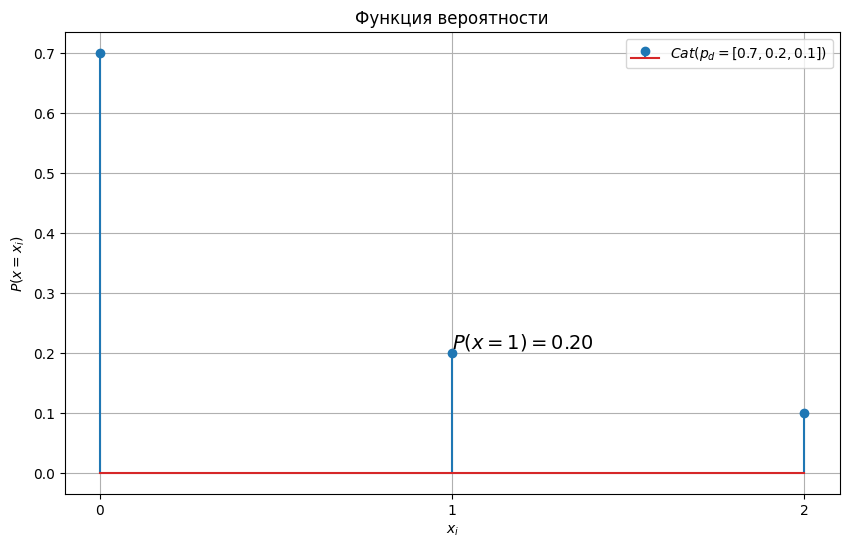

In [19]:
# готового варианта для Categorical Distribution не нашел написал свой вариант =)
from categorical_distribution import CategoricalDistribution

# Параметры распределения
pd = [0.7, 0.2, 0.1]
values = [0, 1, 2]

# частный случай, - дискретное равномерное распределение (игральный 6-гранный кубик)
# pd = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# values = [1, 2, 3, 4, 5, 6]

# частный случай, - распределение Бернулли
# pd = [0.8, 0.2]
# values = [0, 1]

# значение k для которого хотим подписать вероятность на графике
x_i = 1
pd_round = np.array(pd).round(2).tolist()

# Вычисляем функцию вероятностей (pmf)
cat_dist = CategoricalDistribution(values=values, pd=pd)
x = np.array(values)
y = cat_dist.pmf(x)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Cat(p_d={pd_round})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    x[x_i],
    y[x_i],
    f"$P(x={x[x_i]})={y[x_i]:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

**Ключевой момент:**
* Вероятность, что дискретная случайная величина ($x$) примет конкретное значение ($a$) равна значению функции вероятности $f(x)$ для этой точки:
 $$ P(x=a)=f(x=a)$$

#### Генерация выборки из распределения

In [23]:
sample_size = 10  # количество чисел для генерации

# Генерируем последовательность из 8 элементов
sequence = np.random.choice(values, p=pd, size=sample_size)
print(sequence)

[0 0 1 0 0 0 0 1 0 2]


### Распределение Бернулли $Bern(p)$

`Bernoulli distribution` - английский термин в статьях и фреймворках.

В теории вероятностей **всегда** известен закон распределения и его параметры!

Например, разработчики RPG-игры явно задают вероятности событий(см. рисунок ниже).

Есть персонаж игры и он может открыть сундук с сокровищами, используя отмычку.

При открытии сундука персонаж может:
* открыть сундук "успех"
* не открыть сундук "неудача"

Используя распределение Бернулли мы можем определить с какой вероятностью сможет открыть сундук в игре. 

![images](images/bernulli_distribution.png)

Схема `эксперимента Бернулли`.

Мы рассматриваем 1 эксперимент и вероятности происхождения исходов $$\Omega=\left\lbrace 0, 1 \right\rbrace$$


* `1` произошло `интересное` для нас событие. 

По терминологии схемы `эксперимента Бернулли` это событие называется `успех`.

Вероятность этого события обозначим $p=P(x=1)$

* `0` `интересного` для нас события не случилось.

По терминологии схемы `эксперимента Бернулли` это событие называется `неудача`.

Вероятность этого события обозначим $q=P(x=0)$ и $q=1-p$. 

Модель `распределения Бернулли` $Bern(p)$ имеет параметр:
   * $p$ - который представляет собой вероятность наступления события-`успеха`.

Моделируем вероятность открытия сундука с его помощью:
* `1` - сундук открыт, `успех`.
* `0` - сундук остался закрытым, `неудача`.

> Зафиксировав значение параметра $Bern(p)$ распределения $$\theta=\left\lbrace p=0.3\right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, - `функцию вероятностей` дискретного распределения.



#### Probability Mass Function

`Функция вероятности (PMF)` для распределения Бернулли $Bern(p)$:

$$Bern\left(p \mid x=a \right)=\left\lbrace
\begin{array}{llllllllll}
	p   & ,x=1                                  \\
	1-p & ,x=0                                  \\
\end{array}\right\rbrace$$

при $a \in \left\lbrace0,1\right\rbrace$

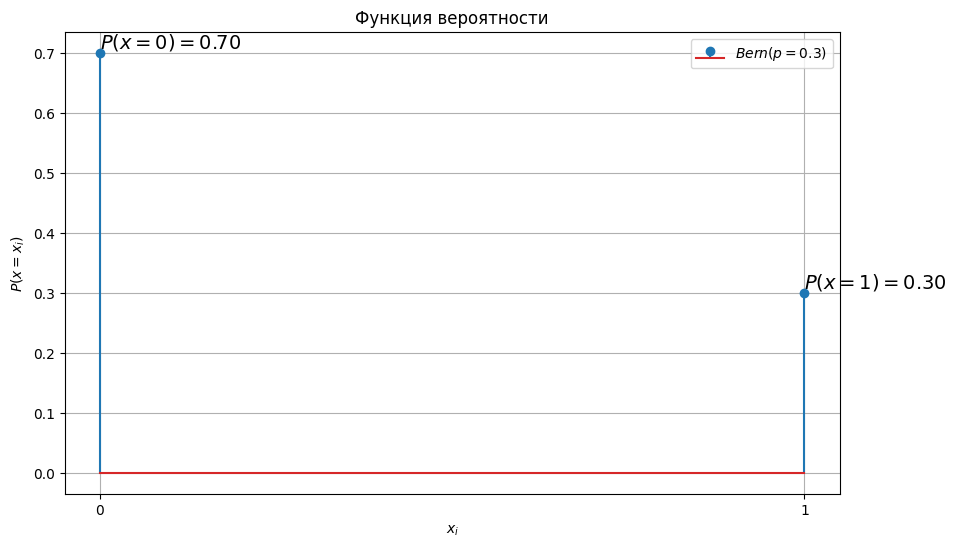

In [5]:
# Параметры распределения
p = 0.3

# Создание объекта распределения Бернулли
bernoulli_dist = stats.bernoulli(p=p)

x = np.arange(0, 1 + 1)
y = bernoulli_dist.pmf(x)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Bern(p={p})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    0,
    1 - p,
    f"$P(x={0})={1-p:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

ax.text(
    1,
    p,
    f"$P(x={1})={p:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

#### Генерация выборки из распределения

In [6]:
# результат работы двух функций идентичен
def bernoulli_np(p, n=1):
    return np.random.choice([0, 1], size=n, p=[1 - p, p])


def bernoulli_stats(p, n=1):
    return stats.bernoulli(p).rvs(size=n)


sample_size = 10  # Количество чисел для генерации

bernoulli_numbers = bernoulli_stats(p, sample_size)
print(bernoulli_numbers)

[0 1 1 0 0 0 0 0 0 0]


## Теория вероятности резюме

Все распределения из Теории вероятностей - простейшие модели генераторов чисел с набором параметров $\theta$.

Обозначение $P(\theta \mid x)$ говорит нам:
* Распределение $P$
* с набором параметров $\theta$ каждый из которых равен опр. значению
* для случайной величины, принявшей значение $x$
* отдает нам:

1. значение `функции вероятности (PMF)` для дискретной случ. величины

или

2. значение `функции плотности вероятности (PDF)` для непрерывной случ. величины

Задавая эти параметры, мы получаем точный статистический закон по которому генерируются объекты.

![image](images/parametric_models.jpg)

В теории вероятностей:

* мы работаем с математическими моделями, которые позволяют моделировать поведение случайных величин.
* мы всегда точно знаем какая модель случайной величины(распределение) генерирует данные и значения параметров $\theta$ этой модели.
* все сгенерированные значения подчиняются этому фундаментальному для них закону.

Теория вероятности дала нам множество моделей с параметрами для генерации объектов.

* Как же создать на их основе генеративную модель?

# Математическая статистика

## Постановка задачи Мат. статистики

Где то мы уже слышали раньше, что то похожее... (см. рисунок ниже).

У нас есть некоторый источник порождающий данные $X^{data}$.

$Х^{data}$ - это случайная величина.

Случайная, т.е. есть Неопределенность. Мы не знаем какое значение будет получено следующим.

Для нас Источник данных это "черная коробочка" или "таинственный сундук".

Как он устроен внутри неизвестно.

Мы наблюдали за Источником, и собрали некоторую выборку $X^{data}$ из экспериментальных данных 

$X^{data}=\left\lbrace X_1^{data}, X_2^{data},X_3^{data}, ...,\right\rbrace$ , размером $n$.

![image](images/mathematical_statistics.png)

Мы не знаем:

* саму модель распределения
* значения ее параметров $\theta'$, с которыми оно генерирует выборку

Специалист по Мат. статистике предполагает опр. модель(статистическое распределение) из Теории вероятностей.

$P_{model}\left(\theta \mid х \right)$

Нужно как то "подобрать" все параметры модели по экспериментальной выборке:

$\left\lbrace X_1^{data}, X_2^{data}, X_3^{data}, ..., X_n^{data} \right\rbrace$

В математической статистике существуют `методы оценки параметров`.

Они позволяют подобрать `оптимальные` значения параметров:

$\theta=\hat{\theta}$

для выбранной модели $P_{model}\left(\theta=\hat{\theta} \mid х \right)$ распределения на экспериментальной выборке $X^{data}$.

### i.i.d. - Independent and Identically Distributed

Мы предполагаем, что все объекты выборки:

* `independent` (`независимы`)

Вероятность появления одного объекта выборки не влияет на вероятность появления другого объекта.
См. примеры:
1. Пример зависимых событий (извлечение шаров из урны безвозвратно)
2. Пример независимых событий (извлечение шаров из урны с возвращением)

* `identically distributed` (`одинаково распределены`)

Все объекты выборки имеют одинаковое распределение вероятностей $P_{data}(\theta \mid x)$.

Или по другому, - все объекты выборки были сгенерированы одной моделью $P_{data}(\theta \mid x)$

Это фундаментальное предположение `i.i.d. - Independent and Identically Distributed` (`Независимы и одинаково распределены`) в математической статистике.

Это предположение позволяет нам считать, что все объекты выборки были сгенерированы распределением:

* $P_{data}(\theta=\theta' \mid x)$
* с набором параметров $\theta=\theta'$

Мы не знаем:

* саму модель распределения
* значения ее параметров $\theta'$, с которыми оно генерирует выборку

Специалист по Мат. статистике предполагает опр. модель(статистическое распределение) из Теории вероятностей.

$P_{model}\left(\theta \mid х \right)$

Нужно как то "подобрать" все параметры модели по экспериментальной выборке:

$\left\lbrace X_1^{data}, X_2^{data}, X_3^{data}, ..., X_n^{data} \right\rbrace$

В математической статистике существуют `методы оценки параметров`.

Они позволяют подобрать `оптимальные` значения параметров:

$\theta=\hat{\theta}$

для выбранной модели $P_{model}\left(\theta=\hat{\theta} \mid х \right)$ распределения на экспериментальной выборке $X^{data}$.




### Пример зависимых событий (извлечение шаров из урны безвозвратно)

У нас есть урна с 4-мя шарами:
* 2 `синих`
* 2 `красных`

Мы каждый раз достаем из урны 1 шар и не возвращаем его назад.

* Какая это модель статистического распределения и каковы ее параметры $\theta$?

Мы хотим извлечь первый шар из урны(объект выборки 1):

* $P(красный)=\frac{2}{4}=\frac{1}{2}$
* $P(синий)=\frac{2}{4}=\frac{1}{2}$
* $P(красный)=P(синий)$

Допустим мы достали из урны `красный` шар и не вернули его обратно.

Теперь мы хотим извлечь второй шар из урны(объект выборки 2).

Теперь у нас урна с 3-мя шарами:
* 2 синих
* 1 красных

Т.е. после появления `красного` шара в нашей выборке, последующие вероятности появления шаров изменились:

* $P(красный)=\frac{1}{3}$
* $P(синий)=\frac{2}{3}$
* $P(красный) \ne P(синий)$

### Пример независимых событий (извлечение шаров из урны с возвращением)

У нас есть урна с 4-мя шарами:
* 2 `синих`
* 2 `красных`

Мы каждый раз достаем из урны 1 шар и возвращаем его назад.

* Какая это модель статистического распределения и каковы ее параметры $\theta$?

Мы хотим извлечь первый шар из урны(объект выборки 1):

* $P(красный)=\frac{2}{4}=\frac{1}{2}$
* $P(синий)=\frac{2}{4}=\frac{1}{2}$
* $P(красный)=P(синий)$

Допустим мы достали из урны `красный` шар и вернули его обратно.

Теперь мы хотим извлечь второй шар из урны(объект выборки 2).

Исходные данные не изменились, - у нас все так же урна с 4-мя шарами:
* 2 синих
* 2 красных

После появления `красного` шара в нашей выборке, последующие вероятности появления шаров не изменились:

* $P(красный)=\frac{2}{4}=\frac{1}{2}$
* $P(синий)=\frac{2}{4}=\frac{1}{2}$
* $P(красный)=P(синий)$

### Связь теории вероятностей и мат. статистики

Важный момент:

- `Теория вероятностей` предоставляет `модели распределений` для описания случайных величин, а `Математическая статистика` использует эти `модели распределений` для описания экспериментальных данных.

Проводя аналогию с `Машинным обучением`, можно сказать, что `мат. статистка` позволяет "обучать" параметры выбранных моделей из `Теории вероятностей` на экспериментальной выборке.

## Два подхода мат. статистики

**Вопрос:** Так какие методы можно использовать для подбора параметров статистической модели?

**Ответ:** Зависит от того как смотреть на случайность.

Есть два разных подхода к восприятию случайности и они приводят к двум разным разделам мат. статистики:
* Частотная мат. статистика `Frequentist statistics` Рональд Фишер (Ronald Aylmer Fisher)
* Байесовские методы `Bayesian statistics` Томас Байес (Thomas Bayes) и Пьер-Симон Лаплас (Pierre-Simon Laplace)

![image](images/frequentist_and_byesians.png)

### Сравнительная таблица подходов от Дмитрия Ветрова

|                                                                        | Frequentist                                                                                                                                              | Bayesian                                                                                                                                                                                                                        |
| ---------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| интерпретация<br>случайности                                           | **Объективная неопределённость**<br>есть случайные процессы<br>их принципиально нельзя<br>предсказать.<br>Примеры:<br>* квантовая физика                 | **Субъективное незнание**<br>все определено, но у нас нет <br>всех данных для однозначного<br>прогнозирования.<br>Случайность, как мера нашего незнания.<br>(нет нужных данных)<br>Примеры:<br>* бросок монеты, приход автобуса |
| Величины                                                               | Случайные и детерминированные.<br>Случайная величина:<br>- случ. величина (опр. распределением)<br>Параметры модели:<br>- детерминированы(заданы числом) | Все можно интерпретировать<br>как случайную величину.<br>Случайная величина:<br>- случ. величина(опр. распределением)<br>Параметры модели:<br>- случ. величина(опр. распределением)                                             |
| Метод<br>оценки<br>параметров<br>модели <br>(Вывод)<br>(Inference)<br> | Точечные оценки:<br>(оптимальные значения параметров)<br>- Метод максимального правдоподобия(MLE)<br>- Метод моментов<br>                                | - Байесовский вывод:<br>(Апостериорное распределение)                                                                                                                                                                           |
| Применимость                                                           | n >> d<br>n - размер выборки<br>d - размерность параметров                                                                                               | ∀n<br>n - размер выборки                                                                                                                                                                                                        |
| Совместимость                                                          | Изначально работает в области<br>n >> d                                                                                                                  | при n → ∞<br>переходит в MLE                                                                                                                                                                                                    |

Рекомендую посмотреть лекции (по желанию) сравнивающие два этих подхода:
* Лекция от Дмитрия Ветрова ([ссылка](https://youtu.be/Ejsr3S79gcQ?si=xRYtdR4coVRfauk3&t=1020))
* Лекция от Филиппа Ульянкина ([ссылка](https://youtu.be/3ejA7UYy6Jk?si=Wni6LVZhytf13UvJ))

`Математическая статистика` и ее
* `Частотный`  и
* `Байесовский`

подходы очень интересны, но это большие темы, которые даже обзорно затруднительно полностью рассмотреть в рамках одной лекции.

Мы остановимся только на
* Методе Максимального Правдоподобия (Maximum likelihood estimation, сокр. `MLE`)

Более подробно про `Математическую статистику` можно узнать из `великолепных бесплатных курсов`:
* Дмитрий Ветров "Байесовские методы в машинном обучении" ([ссылка YouTube](https://youtube.com/playlist?list=PLEqoHzpnmTfCiJpMPccTWXD9DB4ERQkyw), [описание курса](http://www.machinelearning.ru/wiki/index.php?title=Бммо)).
* Ульянкин Филипп и Демешев Борис "Прикладная статистика" ([ссылка YouTube](https://www.youtube.com/@Прикладнаястатистика/playlists), [ссылка github-репо курса](https://github.com/FUlyankin/matstat-AB))

Это доп. материал для интересующихся, для прохождения нашего курса в обязательном порядке он не требуется.                                                   

## Дискретная случайная величина. Задача

### Математическая статистика. Частотный подход

`Математическая статистика` работает с обратной для `теории вероятностей` ситуацией.

* у нас есть экспериментальная выборка данных $\left\lbrace x_1, x_2, x_3, ..., x_n\right\rbrace$:

![image](images/special_offer.png)

Например, у нас есть свой интернет магазин.

есть клиенты участвующие в акции нашей компании:
* событие 0 - не участвуют
* событие 1 - участвуют

Экспериментальная выборка:
```
[0 1 1 0 0 0 0 0]
```

Например, есть товары в подарок, которые можно выбрать по акции:
* событие 1 - солнечные очки
* событие 2 - массажер для спины (популярен у ит специалистов =) )
* событие 3 - подписка на онлайн кинотеатр

Экспериментальная выборка:
```
[1, 1, 2, 2, 3, 3, 3, 3]
```

**Условия:**
* мы ничего не знаем о модели статистического распределения, которая генерирует экспериментальную выборку значений случайной величины $x$.
* мы предполагаем что объекты нашей выборки `i.i.d. - Independent and Identically Distributed` (`Независимы и одинаково распределены`)

Клиенты выбирают независимо друг от друга, никто никому не советует не подсказывает.

Т.е. `мы предполагаем`, что существует некоторая модель статистического распределения

$P_{data}(\theta=\theta' \mid x)=?$

с зафиксированными значениями параметров $\theta=\theta'$ согласно, которой сгенерированы наши данные.

* Нужно выбрать модель(статистическое распределение) из Теории вероятностей, которое подходит для наших данных.

**Для моделирования**
* участия в акции мы выбрали, - $Bern(p)$
* выбора подарка, - $Cat(p_d)$

Нужно подобрать параметры:
* $\theta_{Bern}=\left\lbrace p=?\right\rbrace$
* $\theta_{Cat}=\left\lbrace p_d=?\right\rbrace$

* Мы можем `подобрать` параметры $\theta$, которые лучше всего описывают `имеющиеся на данный момент времени данные`.



### Подбор наиболее правдоподобных параметров для распределения

Моделируем участия в акции магазина.

```
[0 1 1 0 0 0 0 0]
```

и мы ничего не знаем о математической модели по которой они генерируются.

* Мы предполагаем, что эти данные подчищаются распределению Бернулли $Bern(p)$.
* Мы не знаем какой параметр $p$ у этого распределения

### Как оценить хорошо ли был выбран параметр?

#### Опытно-экспериментальный подход

**Проблема**:

Два специалиста по мат. статистике предлагают 2 набора параметров для распределения Бернулли $Bern(p)$, описывающего наши данные:
1. $\theta_1=\left\lbrace p=0.2 \right\rbrace$
2. $\theta_2=\left\lbrace p=0.4 \right\rbrace$

Как узнать какой из наборов описывает процесс генерации наших данные лучше?

#### Правдоподобие (Likelihood)

> `Функция правдоподобия (Likelihood function)` это функция для оценки вероятности сгенерировать конкретное значение $x_i$ из нашей выборки выбранным распределением с такими то параметрами $\theta'$.

$L(\theta')=f(\theta' \mid x_i)$

* Ее часто называемая просто `Правдоподобие(Likelihood)`.

Для $Bern(p)$:

$$\mathcal{L}\left(\theta=\left\lbrace p = 0.4 \right\rbrace\left|x=a\right|\right)=f_{\theta=\left\lbrace p = 0.4 \right\rbrace\left.\right.}\left(x=a\right)$$

Или сокращенно:
$${\mathcal{L}}(\theta\mid x=a)=f_{\theta}(x=a)=P_{\theta}(x=a)$$

> `Для дискретной` случайной величины значение `Правдоподобия(likelihood)` это вероятность $P_{\theta}(x=a)$ сгенерировать $x=a$.

> Для непрерывной случайной величины, `Правдоподобие(likelihood)`, это скорее некоторая мера оценки вероятности, определенная через `функцию плотности распределения`.

Для распределения Бернулли значение `Правдоподобия(likelihood)` для значений легко определить из формулы:

$${\mathcal{L}}(\theta\mid x=a) = P_{\theta}(x=a) = Bern\left(p \mid x=a \right)=\left\lbrace
\begin{array}{llllllllll}
	p   & ,x=1                                  \\
	1-p & ,x=0                                  \\
\end{array}\right\rbrace$$

при $a \in \left\lbrace0,1\right\rbrace$

В нашем случае:
* $\mathcal{L}\left(\theta=\left\lbrace p = 0.4 \right\rbrace\left|x=0\right|\right)=q=1-p=1-0.4=0.6$
* $\mathcal{L}\left(\theta=\left\lbrace p = 0.4 \right\rbrace\left|x=1\right|\right)=p=0.4$

### Подбор наиболее правдоподобного параметра для распределения Бернулли

> `Правдоподобие для выборки` оценивает вероятность получить экспериментальные данные $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$ с помощью выбранного нами типа распределения с фиксированными значениями параметров для этого распределения $\theta$:

$$\mathcal{L}(\theta\mid x_1,x_2,x_3,x_4,...,x_n)=f_{\theta}(x_1,x_2,x_3,x_4,...,x_n)$$

где для дискретной случайной величины $f_{\theta}(x=x_1)$ это `функция вероятности` $P_{\theta}(x=x_1)$.

Учитывая, что каждое значение из наших данных это отдельное наблюдение, которое никак не зависит от предыдущих, можно рассмотреть все как произведение вероятностей независимых событий:

$$\mathcal{L}(\theta\mid x_1,x_2,x_3,x_4,...,x_n) = f_{\theta}(x_1,x_2,x_3,x_4,...,x_n) = f_{\theta}(x_1) \cdot f_{\theta}(x_2) \cdot f_{\theta}(x_1) \cdot ... \cdot f_{\theta}(x_n) = \underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i) $$

$$\mathcal{L}(\theta\mid x_1,x_2,x_3,x_4,...,x_n) = \underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i)= \underset{i=1}{\overset{n}{\prod}}P_{\theta}(x_i) $$

Чем выше значение `Правдоподобия для выборки` полученное для выбранного типа распределения $Bern(p)$ и набора его параметров $\theta_i$ для наших экспериментальных данных $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$, тем вероятнее, что данные получены именно такой моделью.

Если 

$$\mathcal{L}(\theta_1\mid x_1,x_2,x_3,x_4,...,x_n) > \mathcal{L}(\theta_2\mid x_1,x_2,x_3,x_4,...,x_n)$$

то говорят, что закон генерации $Bern(\theta_1)$, `более правдоподобен`, чем $Bern(\theta_2)$.

In [24]:
# экспериментальные данные
x = [0, 1, 1, 0, 0, 0, 0, 0]

# параметры для распределения предложенные специалистами 1 и 2
theta_1 = {"p": 0.2}
theta_2 = {"p": 0.4}


# Правдоподобия для распределения Бернулли от специалиста 1
L1 = stats.bernoulli.pmf(x, p=theta_1["p"])
L1_for_samples = np.prod(L1)

# Правдоподобия для распределения Бернулли от специалиста 2
L2 = stats.bernoulli.pmf(x, p=theta_2["p"])
L2_for_samples = np.prod(L2)

print(f"Правдоподобие, что выборка получена из распределения с параметрами от специалиста 1 {L1_for_samples}")
print(f"Правдоподобие, что выборка получена из распределения с параметрами от специалиста 2 {L2_for_samples}")
print("L1_for_samples < L2_for_samples ?")
print(L1_for_samples < L2_for_samples)

Правдоподобие, что выборка получена из распределения с параметрами от специалиста 1 0.010485759999999995
Правдоподобие, что выборка получена из распределения с параметрами от специалиста 2 0.00746496
L1_for_samples < L2_for_samples ?
False


Видим, что $(\theta_2 \mid x)$ от специалиста 2, выглядит `более правдоподобным`, для описания закона по которым генерируются наши экспериментальные данные =)

#### Вероятность(Probability) Vs Правдоподобие(Likelihood)

P.S. Как отмечает `Josh Starmer (StatQuest)` в своем видео ([ссылка](https://youtu.be/O2L2Uv9pdDA?si=fPhavj5BcTLR-S3O)) об алгоритме `Multinomial Naive Bayes Classifier` многие люди ошибочно называют в данном алгоритме `Правдоподобие(Likelihood)` `Вероятностью(Probability)`.

А мы видим полную картину и ии отличия:



Отметим важное отличие между `Вероятностью(Probability)` и `Правдоподобием(likelihood)` для дискретной случайной величины.

**Теория вероятности и Вероятность:**
* Известен фундаментальный закон генерации данных (тип распределения и его параметры $\theta$). Все данные подчиняются ему. 
* Вероятность оценивает вероятность появления значения согласно этому фундаментальному закону.
* Вероятность $P\left(x=a\right)$ оценивается для конкретного значения $x=a$, при этом $a$ принимает одно из возможных значений элементов пространства элементарных событий $a \in  \Omega = \left\lbrace e_1, e_2, ... e_k \right\rbrace$.
* Значение вероятности всегда $P \in [0, 1])$
* Вероятность не зависит от экспериментальных данных, ведь данные всегда удовлетворяют фундаментальному закону.

**Мат. статистика и правдоподобие:**
* Не известен фундаментальный закон генерации данных.
* Мы сами выбираем тип распределения, которым попытаемся описать механизм генерации имеющихся на данный момент времени данных.
* Мы сами выбираем параметры для выбранного распределения $\theta$.
* Правдоподобие оценивает вероятность генерации экспериментального значения согласно выбранному распределению и выбранным для него параметрам: 
  ${\mathcal{L}}(\theta\mid x=a)=P_{\theta}(x=a)$. Правдоподобие ${\mathcal{L}}(\theta\mid x=a)$ это действительно дискретная вероятность $P_{\theta}(x=a)$ сгенерировать $x=a$.
* Для дискретной случайной величины значение правдоподобия всегда $\mathcal{L} \in [0, 1])$.
* Правдоподобие зависит от экспериментальных данных, и меняется при получении новых.

#### Метод Оценки максимального правдоподобия (Maximum likelihood estimation [сокр. MLE]

**Проблема:**
Поскольку параметры распределения могут принимать бесконечное число различных значений, у нас будет бесконечное множество вариантов различных параметров, и соответствующих им распределений.

`А можно ли сразу найти самые лучшие параметры для выбранного типа распределения, которое лучше всего подойдут в качестве модели-генератора наших данных?`

> `Оценка максимального правдоподобия (Maximum likelihood estimation [MLE])` состоит в подборе такого набора параметров $\widehat{\theta}^{MLE}$ для выбранного распределения при котором `Правдоподобие для выборки` на наших данных достигнет максимума.

$$ {\widehat{\theta}}^{M L E}=\underset{\theta}{\mathrm{argmax}}\,\mathrm{L}(\theta\mid x_{1},\ldots,x_{n})=\underset{\theta}{\mathrm{argmax}}\,\underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i)$$

Метод `Оценки максимального правдоподобия (MLE)` позволяет работать с различными распределениями как `для непрерывных` так, и `для дискретных` случайных величин.

Нам нужно максимизировать выражение правдоподобия для выборки.

Для этого нам нужно найти его экстремум, доказав, что это максимум.

Полный список шагов:
1. Найти производные функции по всем параметрам модели $\theta$.
2. Приравнять их к нулю и решить уравнения относительно параметров.

Решения этих уравнений ${\widehat{\theta}}^{M L E}$ и будут оптимальными значениями параметров распределения.

Так мы найдем параметры соответствующие особым точкам, но надо бы еще убедится, что это максимум.

3. Берем вторые производные и если они меньше нуля при подстановке наших параметров $\widehat{\theta}^{M L E}$, то мы нашли максимум.

На практике доказывается, что наша функция будет унимодальна - есть только 1 максимум.

И выполняют только шаги 1 и 2.

Попробуем найти производную по всем параметрам модели:

$$ {\widehat{\theta}}^{M L E}=\underset{\theta}{\mathrm{argmax}}\,\mathrm{L}(\theta\mid x_{1},\ldots,x_{n})=\underset{\theta}{\mathrm{argmax}}\,\underset{i=1}{\overset{n}{\prod}}f_{\theta}(x_i)$$

Производная произведения:

* для двух функций: $\left(f g\right)^{\prime}=f^{\prime}g+f g^{\prime}$
* для 3 функций: $(u\cdot v\cdot w)^{\prime}=u^{\prime}\cdot v\cdot w+u\cdot v^{\prime}\cdot w+u\cdot
v\cdot w^{\prime}$

Метод MLE применяется при $n >> d$:
* $d$ - количество параметров которые мы хотим оценить.
* $n$ - размер выборки (датасета)

Для оценки 10 параметров, нужен размер выборки на 1000 объектов минимум.

Произведение 1000 функций, и от этого производную =)

А в датасетах бывает и $10^6$ образцов и как нам считать такие производные?

##### Логарифм правдоподобия и его преимущества

`Логарифм правдоподобия` это $Log(L(\theta) \mid x)$

1. **Инвариантность к монотонным преобразованиям:**

Логарифм — монотонная функция, поэтому максимум логарифма правдоподобия соответствует максимуму самой функции правдоподобия. 

Это означает, что оптимизация логарифма правдоподобия даст те же оценки параметров, что и оптимизация исходной функции правдоподобия.

2. **Логарифм меняет произведение на сумму**

Брать производную от суммы функций гораздо проще, чем от произведения функций:

Производная от суммы функций:

* для 2 функций: $(f+g)^{\prime}=f^{\prime}+g^{\prime}$
* для 3 функций: $(f+g+w)^{\prime}=f^{\prime}+g^{\prime}+w^{\prime}$
* для n функций: $\left({\sum}_{i=1}^nf_i(x)\right)^{\prime}={\sum}_{i=1}^nf_i(x)^{\prime}$


При использовании `логарифма правдоподобия`, выражение задачи для $\widehat{\theta}^{MLE}$ преобразуется в вид:

$$\log L\left(\theta\right)=\log\left(\prod_{i=1}^nf(\theta \mid x_i)\right)=\sum_{i=1}^n\log(f(\theta \mid x_i))$$

Задача оптимизации по максимизации `логарифма правдоподобия` через параметр $\theta$ сведется к поиску экстремума:

$${\frac{\partial log_{}{L}}{\partial\,\theta}}=\sum_{i=1}^n{\frac{\partial log_{}f(x_{i}\mid\theta)}{\partial\,\theta}}=0$$

Решив это уравнение получим оптимальный набор параметров распределения ${\widehat{\theta}}^{MLE}$ для выбранного нами распределения.

Это распределение будет `наиболее правдоподобным` в качестве генератора имеющейся у нас выборки $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$.

Решение этого уравнения будет различным для различных распределений описывающих нашу случайную величину.

3. Логарифм обеспечивает точность вычислений

Предположим, что нам удается дать ЭВМ задачу на вычисление дифференцирования произведения функций.

Сможем ли мы ее посчитать?

In [25]:
# посмотрим точность для типа float в python
import sys

sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Наименьшее значение - sys.float_info.min (2.2250788585072014e-308)

Наибольшее значение - sys.float_info.max (1.7976931348623157e+308)

Подробности в документации [ссылка](https://translated.turbopages.org/proxy_u/en-ru.ru.0aad166c-66e14549-6e642a45-74722d776562/docs.python.org/library/sys.html#sys.float_info).

При достаточно большом количестве перемножений плотностей вероятности мы можем выйти за данный предел точности.

Предположительно это может случится при расчете вероятности появления картинки персонажа с опр. стилем. Там около 500 пикселей, на каждый из RGB-каналов изображения, итого 1500.

In [26]:
print(10**(-308)) # все еще маленькое значение
print(10**(-350)) # наше маленькое значение превратилось в 0

# ситуация, которой мы опасаемся перемножение большого числа маленьких
# плотностей вероятностей превращается в ноль из за ограничений точности
p = 10**(-308)
print(p * p * p)

1e-308
0.0
0.0


Использование логарифмов существенно повышает точность вычислений:

In [27]:
# маленькая вероятность превратилась в небольшое число
print(np.log10(p))

# использование логарифма
p = np.log10(p)
print(p * p * p) 

-308.0
-29218112.0


Точность вычислений повысилась до $10^{-29218112}$ при ограничении на $10^{-308}$ для float в Python.

Можно использовать логарифм любого основания, при этом $log_{10}$ интуитивно позволяет сразу представить себе порядок величины.

$$log_{10}(x)=2, x=100$$
$$log_{10}(x)=3, x=1000$$
$$log_{10}(x)=2.5, x \in [100,1000]$$

основание 10 удобно =)

#### MLE для распределения Бернулли

Мы берем формулу для распределения Бернулли:
$$Bern\left(p \mid x=a \right)=\left\lbrace
\begin{array}{llllllllll}
	p   & ,x=1                                  \\
	1-p & ,x=0                                  \\
\end{array}\right\rbrace$$

при $a \in \left\lbrace0,1\right\rbrace$

Подставляем в уравнение для MLE, логарифмируем, берем производную и получаем такое значения для параметра $\theta=\left\lbrace p\right\rbrace$, дающее максимальное правдоподобие на экспериментальной выборке $\left\lbrace x_1,x_2,x_3,x_4,...,x_n \right\rbrace$:

$$\widehat p^{MLE}=\overline{x}={\frac{1}{n}} \underset{i=1}{\overset{n}{\sum}}x_{i}$$

P.S. Подробный вывод показан в видео([ссылка](https://youtu.be/-NDFLb4bq60?si=Ff1dG91NWdJpc6Tx)) у Филлипа Ульянкина.

Интересно заметить, что поскольку `Пространство элементарных событий` для распределения Бернулли:
$$\Omega=\left\lbrace 0, 1 \right\rbrace$$

То сумма по всем элементам исключит из нее все элементы $x==0$. При этом каждая $1$-ца даст нам количество элементов $x==1$, т.е. количество раз когда 1-ца встретилась в нашей выборке, - $n_{1}$. Тогда:

$$\widehat p^{MLE}=\overline{x}={\frac{1}{n}} \underset{i=1}{\overset{n}{\sum}}x_{i}=\frac{n_{1}}{n}=\nu_1$$

Т.е. вероятность появления события "успех" сводится к относительной частоте появления события "успех" в наших экспериментальных данных.

$P(x=1)=p=\overline{x}=\frac{n_{1}}{n}=\nu_1$



#### MLE для Категориального распределения

Мы берем формулу для Категориального распределения:
$$f\left(x_i\right)=Cat\left(p_d \mid x=x_i \right)=P\left(x=x_i\right)=p_i$$

при $x_i \in \Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$

Подставляем в уравнение для MLE, логарифмируем. Найти максимум `правдоподобия` можно с помощью метода множителей Лагранжа.

В итоге получаем такое значения для параметра $\theta=\left\lbrace p_d \right\rbrace$, дающее максимальное правдоподобие на экспериментальной выборке $\left\lbrace x_1, x_2, x_3,..., x_n \right\rbrace$:

$$\widehat p_i^{MLE}=\frac{n_{i}}{N}=\nu_i$$

P.S. Подробный вывод показан в видео([ссылка](https://youtu.be/nLzQINlbSPg?si=htaHf746846JRuAD)).

Т.е. вероятность появления события $x_i \in \Omega$ в единичном `эксперименте c d-исходами` при исследовании случайной величины $x$ сводится к относительной частоте появления этого события в наших экспериментальных данных.

$p_i=P(x=x_i)=\frac{n_i}{N}=\nu_i$

Пример оценки:

$p_0=P(x=0)=\frac{4}{8}=0.5$

Для $p_0=0.5$ результат сходится с $p_0=0.5$ с которыми мы генерировали исходные данные.а

#### MLE для родственный распределений

* `Распределение Бернулли` - моделирует исход из двух возможных результатов эксперимента: `успех` и `не успех`.
* `Категориальное распределение` обобщает `распределение Бернулли` на несколько категорий, т.е. в эксперименте рассматривается d-возможных исходов события, а не только 2.
* `Биномиальное распределение` обобщает `распределение Бернулли` на серию экспериментов, т.е. нас интересует число "событий-успехов" в серии длинной из n-экспериментов.
* `Мультиномиальное/Полиномиальное` обобщает `Категориальное распределение` на серию экспериментов, т.е. нас интересует число "событий-успехов" в серии длинной из n-экспериментов.

Результаты `MLE` для параметров появления события всех для всех четырёх распределений **напрямую связаны с относительной частотой появления событий**.

* Распределения Бернулли и Биномиальное:

MLE для $p$:

  Оценка параметра  $p$  (вероятность успеха) равна **относительной частоте успехов** в данных:  

$\hat{p} = \frac{\text{число успехов}}{\text{общее число испытаний}}$

Для акции, считаем долю людей поучаствовавших в акции.

* Категориальное и Мультиномиальное распределения:

MLE для $p_i$:

  Оценка вероятности каждой категории $p_i$ равна **относительной частоте её появления**:

  
$\hat{p}_i = \frac{\text{число наблюдений категории } i}{\text{общее число испытаний}}$

![image](images/special_offer_calc.png)

Общая закономерность

Во всех случаях **MLE сводится к вычислению выборочных пропорций** (относительных частот).

Это связано с тем, что:  

1. Функция правдоподобия для этих распределений пропорциональна произведению вероятностей наблюдаемых исходов.  

2. Максимизация этой функции требует, чтобы оценки параметров соответствовали наблюдаемым частотам.  

**Теоретическое обоснование**  

Связь MLE и относительной частоты подтверждается:  

- **Законом больших чисел**: При увеличении числа испытаний относительная частота сходится к истинной вероятности .  

- **Интегральной теоремой Муавра-Лапласа**: Относительная частота и вероятность становятся близки при большом числе испытаний .  

Согласно MLE для этих распределений **вероятности можно оценивать через наблюдаемые частоты встречаемости**.

## Байесовский вывод

![image](images/Bayesian_inference.png)

**Likelihood (функция правдоподобия)** и **Prior (априорная вероятность)** — ключевые компоненты байесовского вывода.

Их определения и взаимосвязь:

### **1. Prior (Априорная вероятность)**

**Определение**:
  
Это начальное распределение вероятностей параметров модели до наблюдения данных. Оно отражает предварительные знания или убеждения о возможных значениях параметров.  

Например, если мы моделируем вероятность участия в Акции, априорное распределение может быть основано на исторических данных или экспертных оценках.

- **Особенности**:  
  - Субъективно: может включать экспертные мнения или результаты предыдущих экспериментов .  
  - Используется для формирования *априорного предсказательного распределения* (prior predictive distribution), которое оценивает ожидаемые данные до их сбора.

### **2. Likelihood (Функция правдоподобия)**  
- **Определение**:  
  Оценивает, насколько вероятны наблюдаемые данные при заданных значениях параметров модели.
  
Правдоподобие является распределением данных $P(\text{данные} | \theta)$, где $\theta $ — параметры.  

### **3. Взаимодействие в байесовском выводе**  
 
- **Prior** — начальные убеждения о параметрах ,  
- **Likelihood** — информация из данных ,  
- **Постериорное распределение** — обновленные знания после анализа данных.  

Рассмотрим пример.

Таблица сопряженных распределений

Conjugate prior - Wikipedia
https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta-interp-5


Beta Distribution Applet/Calculator

https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html

# Работа с несколькими событиями происходящими одновременно

## Условная вероятность 

`Conditional probability` - английский термин в статьях.

`Условная вероятность` — это вероятность наступления одного события при условии, что другое событие уже произошло.

Обозначается как $P(A|B)$, что читается как "вероятность события $A$ при условии, что событие $B$ уже произошло".

Условная вероятность события (A) при условии произошедшего события (B) определяется по формуле:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$
Работая с вероятностями их удобно визуализировать диаграммой Эйлера-Венна ([ссылка](https://ru.wikipedia.org/wiki/Диаграмма_Венна)).

Рассмотрим задачу:
* мы бросаем игральную кость. Может выпасть число очков 1,2,3,4,5,6.
Пространство элементарных событий возможных исходов эксперимента $\Omega=\{1,2,3,4,5,6\}$.

События мы задаем как подмножества множества элементарных исходов.
У нас есть события:
* $A$ — событие выпадения четного числа очков на кубике $\Omega_A=\{2, 4, 6\}$
* $B$ — событие выпадения числа большего 3 очков на кубике $\Omega_B= \{4, 5, 6\}$

Нам нужно найти условную вероятность $P(A|B)$ - "вероятность того, что произойдет А при условии, что B уже произошло".

Поскольку мы работаем с множествами, мы можем визуализировать их диаграммой Эйлера-Венна ([ссылка](https://ru.wikipedia.org/wiki/Диаграмма_Венна)).
Изобразим имеющиеся события на диаграмме Эйлера-Венна:

![image](images/eiler_diagram_1.png)

Рассчитаем вероятности событий:
* $P(A) = \frac{3}{6} = \frac{1}{2}$
* $P(B) = \frac{3}{6} = \frac{1}{2}$

 **Найдем по диаграмме Эйлера-Венна:**
* $P(A|B)$ - "вероятность того, что произойдет А при условии, что B уже произошло".

Мы знаем, что случилось B, поэтому все наше пространство возможных исходов событий сокращается до  $\Omega_{A \cap B}= \{4, 6\}$.
Других исходов эксперимента у нас при этом условии уже нет.
Покажем цветом на диаграмме Эйлера-Венна только оставшиеся варианты:

![image](images/eiler_diagram_2.png)

От cобытия А у нас остались еще возможные исходы $\{4,6 \}$.
Это события из $A \cap B$ - пересечения множеств исходов для событий A и B.
* $\Omega= \{4, 6\}$
* $P(A \cap B)=\frac{2}{6}=\frac{1}{3}$

Условная вероятность $P(A|B)$:

* $P(A|B) = \frac{\text{число благоприятных исходов}}{\text{общее число возможных исходов}} =\frac{P(A \cap B)}{P(B)}$
* $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}$

## Совместная вероятность (Joint Probability)

Совместная вероятность — это вероятность того, что два или более события произойдут одновременно. 
Другими словами, это вероятность того, что все указанные события произойдут вместе.

### Обозначение и формула

Если у нас есть два события (A) и (B), их совместная вероятность обозначается как $P(A \cap B)$. 
Формулу для вычисления совместной вероятности выводим $P(A \cap B)$ из определения условной вероятности:   
 $$P(A \cap B) = P(A|B) \cdot P(B) $$
   Аналогично, можно записать:
   $$ P(A \cap B) = P(B|A) \cdot P(A)$$
Таким образом, мы получили **правило цепи для двух событий**:
$$ P(A \cap B) = P(A|B) \cdot P(B) = P(B|A) \cdot P(A) $$
- $P(A)$ — вероятность события $A$,
- $P(B|A)$ — условная вероятность события $B$ при условии, что событие $A$ уже произошло,
- $P(B)$ — вероятность события $B$,
- $P(A|B)$ — условная вероятность события \(A\) при условии, что событие $B$ уже произошло.

### Важные свойства

1. Нормировка:
- Совместная вероятность всегда находится в диапазоне от 0 до 1.
2. Независимость:
- Если события (A) и (B) независимы, то 

### Правило цепи (Chain Rule) в теории вероятностей

Правило цепи (Chain Rule) в теории вероятностей ([ссылка](https://en.wikipedia.org/wiki/Chain_rule_(probability))) позволяет выразить совместную вероятность нескольких событий через условные вероятности. Это правило является одним из фундаментальных инструментов в теории вероятностей и статистике.

Для 2 событий мы его уже знаем:
* Зависимые события: $P(A_1 \cap A_2) = P(A_1) \cdot P(A_2|A_1)$
* Независимые события: $P(A \cap B) = P(A) \cdot P(B)$

Для 3 событий событий $A_1, A_2, A_3$:
* Зависимые события:  $P(A_1 \cap A_2 \cap A_3) = P(A_1) \cdot P(A_2|A_1) \cdot P(A_3|A_1 \cap A_2)$
* Независимые события: $P(A_1 \cap A_2 \cap A_3) = P(A_1) \cdot P(A_2) \cdot P(A_3)$

Для 4 событий $A_1, A_2, A_3, A_4$:
* Зависимые события:  $(A_1 \cap A_2 \cap A_3 \cap A_4) = P(A_1) \cdot P(A_2|A_1) \cdot P(A_3|A_1 \cap A_2) \cdot P(A_4|A_1 \cap A_2 \cap A_3)$
* Независимые события: $(A_1 \cap A_2 \cap A_3 \cap A_4) = P(A_1) \cdot P(A_2) \cdot P(A_3) \cdot P(A_4)$

![image](images/chain_rule_for_probability.png)

## Вывод Правила цепи (chain rule)

**Правило цепи (chain rule) для двух событий**

Из определения условной вероятности:

$P(A_2 \mid A_1) = \frac{P(A_1, A_2)}{P(A_1)}$.

Следует Правило цепи (chain rule) для двух событий:

$P(A_1, A_2) = P(A_1) \cdot P(A_2 \mid A_1)$

**Вывод цепного правила для трёх зависимых событий $A_1, A_2, A_3$:**

Совместная вероятность $P(A_1, A_2, A_3)$ описывает вероятность одновременного наступления всех трёх событий $A_1, A_2, A_3$.

Здесь мы:
- Введем событие $(\underline{A_1, A_2})$ - заключающееся в том, что случились одновременно и $A_1$ и $A_2$.
- Затем учитываем вероятность $A_3$ при условии, что $A_1$ и $A_2$ уже произошли.

Тогда совместная вероятность трёх событий $P(A_1, A_2, A_3)$ может быть разложена через Правило цепи (chain rule) для двух событий:
   
   $P(\underline{A_1,A_2},A_3)=P(\underline{A_1,A_2})\cdot P(A_3\mid\underline{A_1,A_2})$
   
**Рекурсивное применение правила для двух событий**
   
А теперь, просто применим Правило цепи (chain rule) для двух событий к $P(\underline{A_1,A_2})$, теперь уже рассматривая его не как вероятность одного события, а совместного наступления двух, - $A_1$ и $A_2$.

Заменим $P(A_1, A_2)$ в предыдущей формуле, и получим итоговый результат:

$P(A_1, A_2, A_3) = P(A_1) \cdot P(A_2 \mid A_1) \cdot P(A_3 \mid A_1, A_2)$

**Примечания:**  
- Порядок событий может быть произвольным. Например, если начать с $A_2$, то:

$P(A_1, A_2, A_3) = P(A_2) \cdot P(A_1 \mid A_2) \cdot P(A_3 \mid A_1, A_2)$

- Для независимых событий условные вероятности упрощаются: \( P(A_2 \mid A_1) = P(A_2) \), \( P(A_3 \mid A_1, A_2) = P(A_3) \), и формула становится произведением безусловных вероятностей [[2]].

### **Почему это работает?**

- **Условная вероятность** позволяет последовательно "уточнять" информацию о наступлении событий.
Сначала мы учитываем $A_1$, затем $A_2$ при условии $A_1$, и наконец $A_3$ при условии $A_1$ и $A_2$.

- **Ассоциативность пересечения событий**:  
  $P(A_1, A_2, A_3) = P((A_1, A_2) \cap A_3)$. 

Это позволяет разделить сложное пересечение на шаги.
### **Пример**

Предположим:
- $A_1$: Идёт дождь.
- $A_2$: На улице холодно.
- $A_3$: Человек взял зонт.

Тогда:
- $P(A_1)$: Вероятность дождя.
- $P(A_2 \mid A_1)$: Вероятность холода при условии дождя.
- $P((A_3 \mid A_1, A_2)$: Вероятность взятия зонта при условии дождя и холода.

Цепное правило связывает эти условные вероятности в единую формулу .

### Независимые события

Если события независимы, то:
$P(A_2 \mid A_1) = P(A_2), \quad P(A_3 \mid A_1, A_2) = P(A_3)$

и формула упрощается до произведения безусловных вероятностей:
$P(A_1, A_2, A_3) = P(A_1) \cdot P(A_2) \cdot P(A_3)$


### Совместное распределение и "Расщепление вероятностей"

* Событие А - "открыть сундук отмычкой" из примера для распределения Бернулли. $\Omega_A= \{A_0, A_1\}$.
* Событие B - "в сундуке предмет опр. ценности" из примера для Категориального распределения $\Omega_B= \{B_0, B_1, B_2\}$.

Хотим рассмотреть совместное дискретное распределение вероятностей.
Т.е. хотим определить вероятности всех возможных совместных событий (попарно):

$P(A_i \cap B_k) = P(A_i|B_k) \cdot P(B_k) = P(B_k|A_i) \cdot P(A_i)$ при $i \in \{0,1\}$ и $k \in \{0,1,2\}$

Наши события A и B независимы , поэтому:
$P(A_i \cap B_k) = P(A_i) \cdot P(B_k)$

Наше распределение совместной вероятности событий A и B можно записать  виде таблицы:

| A\B                | B0 - дешевый предмет | B1 - обычный предмет | B2 - ценный предмет |     |
| ------------------ | -------------------- | -------------------- | ------------------- | --- |
| A0 - сундук закрыт | 0.5 * 0.7 = 0.35     | 0.3 * 0.7 = 0.21     | 0.2 * 0.7 = 0.14    | 0.7 |
| A1 - сундук открыт | 0.5 * 0.3 = 0.15     | 0.3 * 0.3 = 0.09     | 0.2 * 0.3 = 0.06    | 0.3 |
|                    | 0.5                  | 0.3                  | 0.2                 |     |
На пересечении $i$-той строки и $k$-того столбца будет вероятность совместного происхождения событий $A_i \cap B_k$:
* $P(A_i \cap B_k) = P(A_i) \cdot P(B_k)$

Например:
* событие "сундук открыт и внутри ценный предмет", т.е. $A_1 \cap B_2 =0.2 * 0.3 = 0.06$

При этом:
* ${\sum}_{i=0}^nP\left(A_i\right)P\left(B_i\right)=P\left(B_i\right)$ - получим "исходную" вероятность события $B_i$

Вероятность события $B_i$ как "поделилась/расщепилась" на события $A_0, A_1$

* ${\sum}_{k=0}^mP\left(A_i\right)P\left(B_i\right)=P(A_i)$ - получим "исходную" вероятность события $A_i$

Вероятность события $A_i$ как "поделилась/расщепилась" на события $B_0, B_1, B_2$

Таким образом сумма вероятностей всех возможных комбинаций событий без учета порядка элементов:
${\sum}_{i=0}^n{\sum}_{k=0}^mP\left(A_i\right)P\left(B_i\right)=1$

Для нашего примера:
0.35 + 0.21 + 0.14 + 0.15 + 0.09 + 0.06 = 1


# Генератор стиля


Даны примеры популярных стилей жителей города N. Необходимо сделать генератор новых стилей для них.

![title](images/style.png)

Сделаем список различных элементов стиля:


In [11]:
styles = {
    "прическа": [
        "нет волос",
        "длинные в пучок",
        "длинные волнистые",
        "длинные прямые",
        "короткая волнистые",
        "короткая прямые",
        "короткая курчавые",
    ],
    "цвет волос": [
        "черный",
        "блонд",
        "каштановый",
        "пастельный розовый",
        "рыжий",
        "серебристо серый",
    ],
    "аксесуар": [
        "нет очков",
        "круглые очки",
        "солнцезащитные очки",
    ],
    "одежда": [
        "худи",
        "комбинезон",
        "футболка с круглым вырезом",
        "футболка с V-вырезом",
    ],
    "цвет одежды": [
        "черный",
        "синий",
        "серый",
        "зеленый",
        "оранжевый",
        "розовый",
        "красный",
        "белый",
    ],
}

In [12]:
param_counts = 1
for s in styles.values():
    param_counts *= len(s)
param_counts

4032

In [13]:
styles_count = {
    "прическа": [7, 0, 1, 23, 1, 11, 7],
    "цвет волос": [
        7,
        6,
        2,
        3,
        8,
        24,
    ],
    "аксесуар": [
        11,
        22,
        17,
    ],
    "одежда": [
        7,
        18,
        19,
        6,
    ],
    "цвет одежды": [4, 5, 6, 8, 6, 8, 7, 6],
}

In [14]:
for k in styles_count.keys():
    summ = 0
    for s in styles_count[k]:
        summ += s
    print(k, summ)

прическа 50
цвет волос 50
аксесуар 50
одежда 50
цвет одежды 50


Реализуйте следующие модели:

### Полиномиальная модель

![title](images/polynom.png)

### Аддитивное сглаживание (MLE)

![title](images/MLE.png)

Подробные формулы для наивной байесовской модели с MLE:
![title](images/formla1.png)
![title](images/formula2.png)

### Полиномиальная модель с MLE для пикселей

![title](images/pixels.png)

![title](images/style2.png)

![title](images/pixgen.png)

Как думаете почему наивная байесовская модель плохо справилась с задачей?

#### Сложности генеративного моделирования

* Как модель может справиться с высокой условной взаимозависимостью признаков?

* Как модель может отыскать одну из крошечных пропорций, чтобы получить удовлетворительное наблюдение в многомерном выборочном пространстве?

## Скрытое представление

Набор образцов тортов:
    
![title](images/tort1.png)

А вот так выглядит скрытое представление всех возможных тортов:
![title](images/tort2.png)    

Опишите функцию __f__, если мин высота торта 5 у.е., мин радиус 3 у.е., макс высота торта 25 у.е., макс радиус 35 у.е.

И последний пример скрытого представления:
![title](images/latent.png)    

# Дополнительные материалы

1. Два подхода к математической статистике

Рекомендую посмотреть лекции (по желанию) сравнивающие два этих подхода:
* Лекция от Дмитрия Ветрова ([ссылка](https://youtu.be/Ejsr3S79gcQ?si=xRYtdR4coVRfauk3&t=1020))
* Лекция от Филиппа Ульянкина ([ссылка](https://youtu.be/3ejA7UYy6Jk?si=Wni6LVZhytf13UvJ))

`Математическая статистика` и ее
* `Частотный`  и
* `Байесовский`

подходы очень интересны, но это большие темы, которые даже обзорно затруднительно полностью рассмотреть в рамках одной лекции.

Мы остановимся только на
* Методе Максимального Правдоподобия (Maximum likelihood estimation, сокр. `MLE`)

Более подробно про `Математическую статистику` можно узнать из `великолепных бесплатных курсов`:
* Дмитрий Ветров "Байесовские методы в машинном обучении" ([ссылка YouTube](https://youtube.com/playlist?list=PLEqoHzpnmTfCiJpMPccTWXD9DB4ERQkyw), [описание курса](http://www.machinelearning.ru/wiki/index.php?title=Бммо)).
* Ульянкин Филипп и Демешев Борис "Прикладная статистика" ([ссылка YouTube](https://www.youtube.com/@Прикладнаястатистика/playlists), [ссылка github-репо курса](https://github.com/FUlyankin/matstat-AB))

Это доп. материал для интересующихся, для прохождения нашего курса в обязательном порядке он не требуется.   

3. MLE для распределения Бернулли

P.S. Подробный вывод показан в видео([ссылка](https://youtu.be/-NDFLb4bq60?si=Ff1dG91NWdJpc6Tx)) у Филлипа Ульянкина.

4. MLE для Категориального распределения

P.S. Подробный вывод показан в видео([ссылка](https://youtu.be/nLzQINlbSPg?si=htaHf746846JRuAD)).

5. Байесовский вывод

Таблица сопряженных распределений

Conjugate prior - Wikipedia
https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta-interp-5

Beta Distribution Applet/Calculator

https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html